IMPORT LIBRARIES AND DEPENDENCIES

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

LOADING THE DATASET

In [39]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\Machine Learning Projects\Basic Projects\DATASETS\Eastern Region.csv")

In [40]:
df.shape

(2323, 24)

In [41]:
df.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sales,Quantity,Profit,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day,Discounts
0,15,US-2016-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,...,68.810,5,-123.8580,2016,11,22,2016,11,26,0.8
1,16,US-2016-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,...,2.544,3,-3.8160,2016,11,22,2016,11,26,0.8
2,17,CA-2015-105893,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711,...,665.880,6,13.3176,2015,11,11,2015,11,18,NaN
3,22,CA-2017-137330,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,...,19.460,7,5.0596,2017,12,9,2017,12,13,NaN
4,23,CA-2017-137330,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,...,60.340,7,15.6884,2017,12,9,2017,12,13,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2323 non-null   int64  
 1   Order ID       2323 non-null   object 
 2   Ship Mode      2323 non-null   object 
 3   Customer ID    2323 non-null   object 
 4   Customer Name  2323 non-null   object 
 5   Segment        2323 non-null   object 
 6   Country        2323 non-null   object 
 7   City           2323 non-null   object 
 8   State          2323 non-null   object 
 9   Postal Code    2323 non-null   int64  
 10  Product ID     2323 non-null   object 
 11  Category       2323 non-null   object 
 12  Sub-Category   2323 non-null   object 
 13  Product        2323 non-null   object 
 14  Sales          2323 non-null   float64
 15  Quantity       2323 non-null   int64  
 16  Profit         2323 non-null   float64
 17  Order Year     2323 non-null   int64  
 18  Order Mo

In [43]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Product ID',
       'Category', 'Sub-Category', 'Product', 'Sales', 'Quantity', 'Profit',
       'Order Year', 'Order Month', 'Order Day', 'Ship Year', 'Ship Month',
       'Ship Day', 'Discounts'],
      dtype='object')

HANDLING MISSING VALUES

In [44]:
df.isnull().sum()

Row ID             0
Order ID           0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country            0
City               0
State              0
Postal Code        0
Product ID         0
Category           0
Sub-Category       0
Product            0
Sales              0
Quantity           0
Profit             0
Order Year         0
Order Month        0
Order Day          0
Ship Year          0
Ship Month         0
Ship Day           0
Discounts        828
dtype: int64

In [45]:
df['Discounts'].fillna(df['Discounts'].median, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_21364\2233005452.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.median of 0       0.80
1       0.80
2        NaN
3        NaN
4        NaN
        ... 
2318    0.20
2319    0.32
2320    0.20
2321     NaN
2322     NaN
Name: Discounts, Length: 2323, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Discounts'].fillna(df['Discounts'].median, inplace=True)


EDA

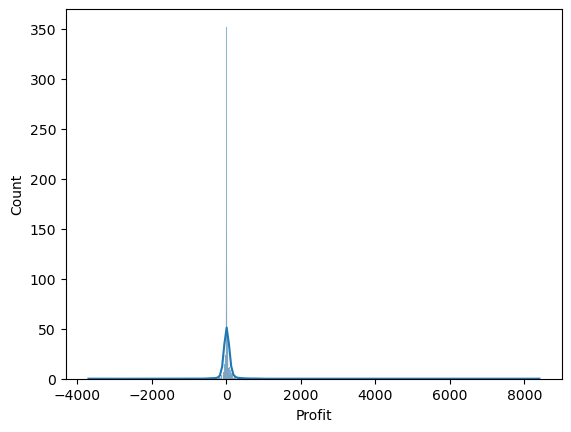

In [46]:
sns.histplot(df['Profit'], kde=True)
plt.show()

DROPPING IRRELEVANT COLUMNS

In [ ]:
drop_cols = [
    'Row ID', 'Order ID', 'Customer ID',
    'Customer Name', 'Product Name',
    'City', 'State', 'Postal Code'
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

Encode Categorical Features

In [54]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)


In [61]:
# 1. Measure cardinality of categorical columns
cat_cardinality = df.select_dtypes(include='object').nunique()

# 2. Define threshold
LOW_CARDINALITY_THRESHOLD = 10

# 3. Split categorical columns
safe_categorical_cols = cat_cardinality[
    cat_cardinality <= LOW_CARDINALITY_THRESHOLD
].index.tolist()

unsafe_categorical_cols = cat_cardinality[
    cat_cardinality > LOW_CARDINALITY_THRESHOLD
].index.tolist()

print("Encoding (safe):", safe_categorical_cols)
print("Dropping (unsafe):", unsafe_categorical_cols)


Encoding (safe): ['Ship Mode', 'Segment', 'Country', 'Category', 'Discounts']
Dropping (unsafe): ['Product ID', 'Sub-Category', 'Product']


In [57]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


Feature / Target Split

In [27]:
x = df.drop('Profit', axis=1)
y = df['Profit']

Train_Test_Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=34)

Feature Scaling

In [65]:
df_encoded = pd.get_dummies(
    df,
    columns=safe_categorical_cols,
    drop_first=True
)


RecursionError: maximum recursion depth exceeded